In [8]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib widget

In [9]:
w = 1.4e-6
l = 1.404e-6

In [10]:
# Load the data from the csv file
# Line format: c = {c:6e}
caps = []
with open('../simulations/mc_cmim.csv', 'r') as f:
    for line in f:
        if line.startswith('c'):
            c = float(line.split('=')[1].strip())
            caps.append(c)

print(f'Loaded {len(caps)} capacitance values.')

Loaded 5999 capacitance values.


In [11]:
# Calculate statistics
mean_cap = np.mean(caps)
std_cap = np.std(caps)
print(f'Width:   {w:.3e} m')
print(f'Length:  {l:.3e} m')
print(f'Mean:    {mean_cap:.6e} F')
print(f'Std.Dev: {std_cap:.6e} F')
print(f'Error:   {std_cap / mean_cap:.2%}')

Width:   1.400e-06 m
Length:  1.404e-06 m
Mean:    2.134511e-15 F
Std.Dev: 6.478434e-17 F
Error:   3.04%


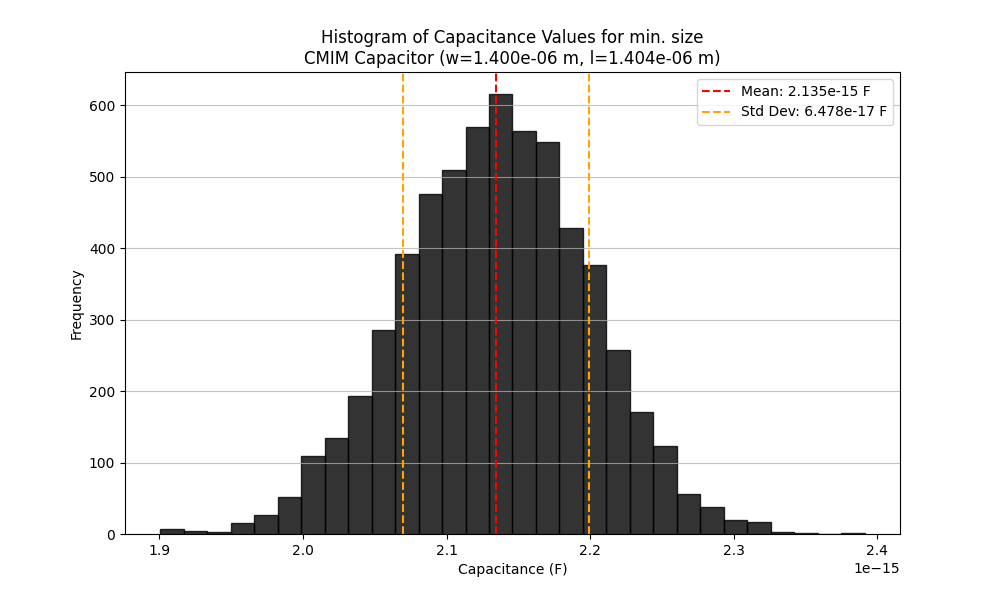

In [13]:
# Histogram of capacitance values
plt.figure(figsize=(10, 6))
plt.hist(caps, bins=30, color='black', alpha=0.8, edgecolor='black')
plt.axvline(mean_cap, color='red', linestyle='dashed', linewidth=1.5, label=f'Mean: {mean_cap:.3e} F')
plt.axvline(mean_cap + std_cap, color='orange', linestyle='dashed', linewidth=1.5, label=f'Std Dev: {std_cap:.3e} F')
plt.axvline(mean_cap - std_cap, color='orange', linestyle='dashed', linewidth=1.5)
plt.title(f'Histogram of Capacitance Values for min. size\nCMIM Capacitor (w={w:.3e} m, l={l:.3e} m)')
plt.xlabel('Capacitance (F)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.legend()
plt.show()